# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("/Users/tengyaolong/Desktop/NTU_DataScience_Lab/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


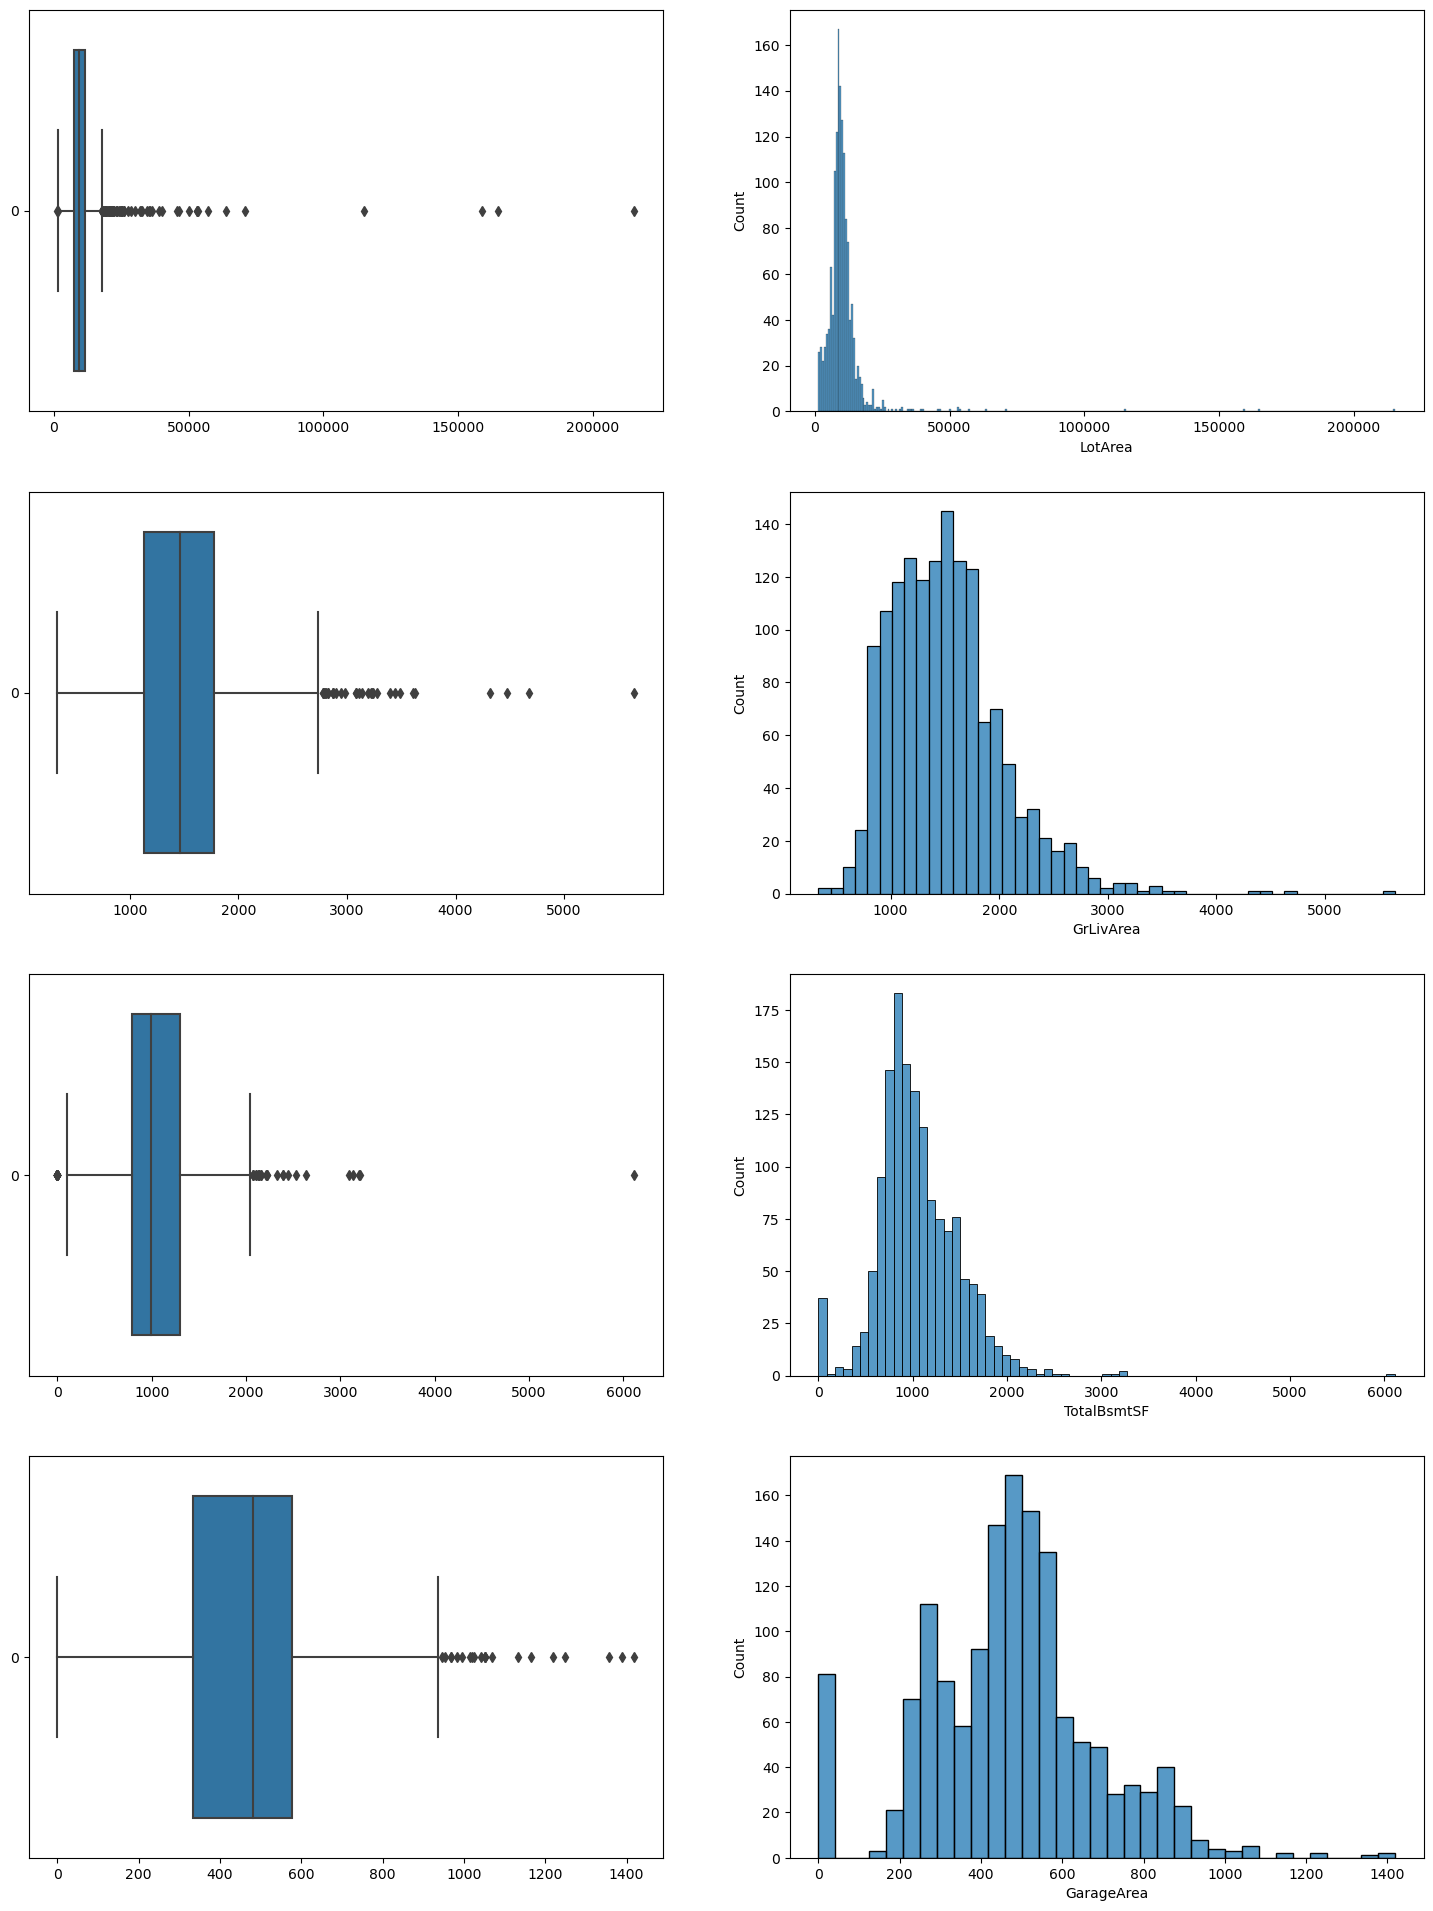

In [3]:
plt.close()
features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
f, axes = plt.subplots(4, 2, figsize=(18, 24))
count = 0

for _ in features:
    sb.boxplot(data = df[_], orient = 'h', ax = axes[count,0])
    sb.histplot(data = df[_], ax = axes[count,1])
    count += 1
    
plt.show()    

In [4]:
df_f = df[features]
df_f.describe() 

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


In [5]:
# count number of outliers and skewness
for _ in features:
    IQR = df[_].quantile(0.75)-df[_].quantile(0.25)
    print("Number of "+_+" outliers:" \
          , (df[_]> df[_].quantile(0.75)+1.5*IQR).sum()+ (df[_]<df[_].quantile(0.25)-1.5*IQR).sum())
    print("Skewness of", _ +":", df[_].skew(axis=0),"\n" )

Number of LotArea outliers: 69
Skewness of LotArea: 12.207687851233496 

Number of GrLivArea outliers: 31
Skewness of GrLivArea: 1.3665603560164552 

Number of TotalBsmtSF outliers: 61
Skewness of TotalBsmtSF: 1.5242545490627664 

Number of GarageArea outliers: 21
Skewness of GarageArea: 0.17998090674623907 



In [16]:
df_c = df.copy()
features.append("SalePrice")
def_c = df_c[features]

def_c.corr(method="pearson")

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


In [7]:
#I choose GrLivArea and GarageArea since they have the least skewness and highest corr with saleprice

#from the txt file Neighbourhood has the highest number of levels

# Problem 2

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64



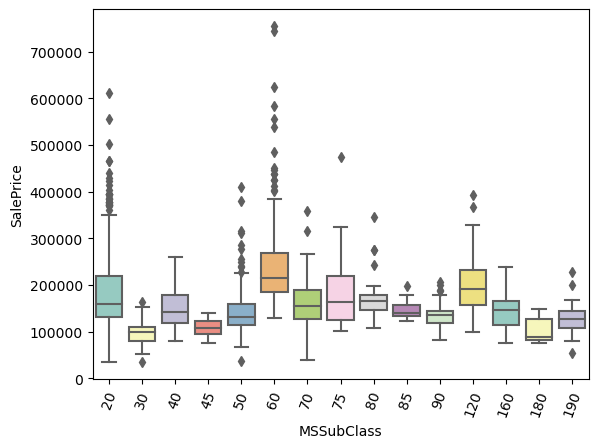

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64



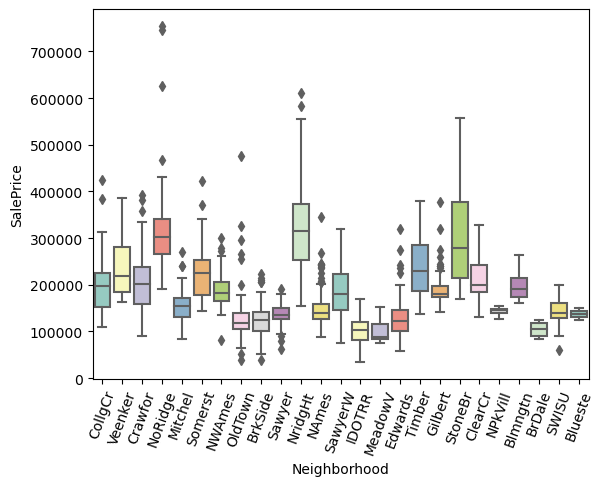

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64



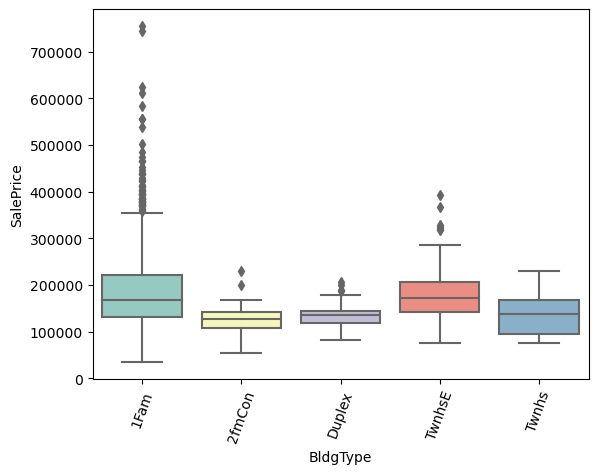

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64



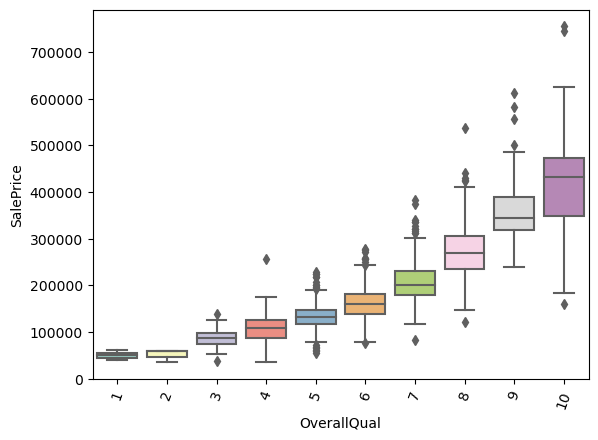

In [8]:
cat = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
for _ in cat:
    print(df[_].value_counts())
    print()
    
    ax = sb.boxplot(x=_ , y="SalePrice", \
                 data=df, palette="Set3")
    ax.tick_params(axis='x', rotation=70)
    plt.show()
                     
                     

In [9]:
#1fam from BldgType has highest number of houses

In [10]:
#I choose overallqual and neighbourhood

# Problem 3

In [11]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [24]:
df_train = df.copy()

le = LabelEncoder()
le.fit(df_train["GarageType"])
df_train["GarageType"]=le.transform(df_train["GarageType"])
df_train["GarageType"].head(50)

0     1
1     1
2     1
3     5
4     1
5     1
6     1
7     1
8     5
9     1
10    5
11    3
12    5
13    1
14    1
15    5
16    1
17    4
18    5
19    1
20    3
21    1
22    1
23    1
24    1
25    1
26    5
27    1
28    1
29    5
30    5
31    1
32    1
33    1
34    1
35    3
36    1
37    1
38    5
39    6
40    1
41    1
42    1
43    5
44    1
45    1
46    1
47    1
48    6
49    1
Name: GarageType, dtype: int64

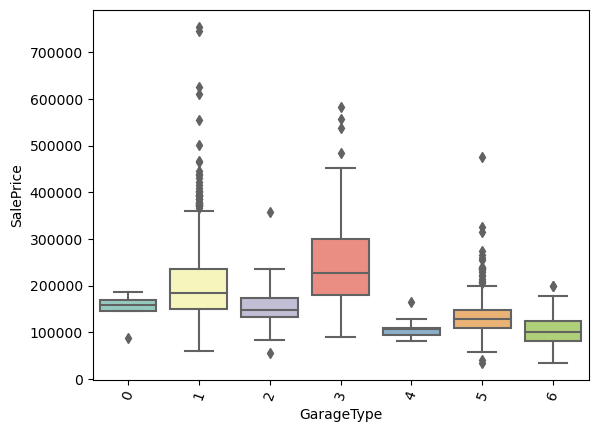

In [20]:
df_train[["GarageType","SalePrice"]].corr(method="pearson")
ax = sb.boxplot(x=df_train["GarageType"] , y="SalePrice", \
                 data=df, palette="Set3")
ax.tick_params(axis='x', rotation=70)
plt.show()

In [23]:
df["GarageType"].head(50)

0      Attchd
1      Attchd
2      Attchd
3      Detchd
4      Attchd
5      Attchd
6      Attchd
7      Attchd
8      Detchd
9      Attchd
10     Detchd
11    BuiltIn
12     Detchd
13     Attchd
14     Attchd
15     Detchd
16     Attchd
17    CarPort
18     Detchd
19     Attchd
20    BuiltIn
21     Attchd
22     Attchd
23     Attchd
24     Attchd
25     Attchd
26     Detchd
27     Attchd
28     Attchd
29     Detchd
30     Detchd
31     Attchd
32     Attchd
33     Attchd
34     Attchd
35    BuiltIn
36     Attchd
37     Attchd
38     Detchd
39        NaN
40     Attchd
41     Attchd
42     Attchd
43     Detchd
44     Attchd
45     Attchd
46     Attchd
47     Attchd
48        NaN
49     Attchd
Name: GarageType, dtype: object

In [ ]:
#NaN garage is encoded to 6, as to be seen there is a difference between having a garage and not having a garage
#hence salerice of house is affected